In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['image.cmap'] = 'magma'
rcParams['image.aspect'] = 1  # to get images with square pixels
rcParams['figure.figsize'] = (20,10)
rcParams['image.interpolation'] = 'None'
rcParams['image.origin'] = 'lower'

import numpy as np
from astropy.table import Table
from astropy.io import fits

In [2]:
data = fits.getdata("/Users/jvmirca/Projects/ze-gsoc16-photutils-notebooks/forZe/0070.Iras20.fits")

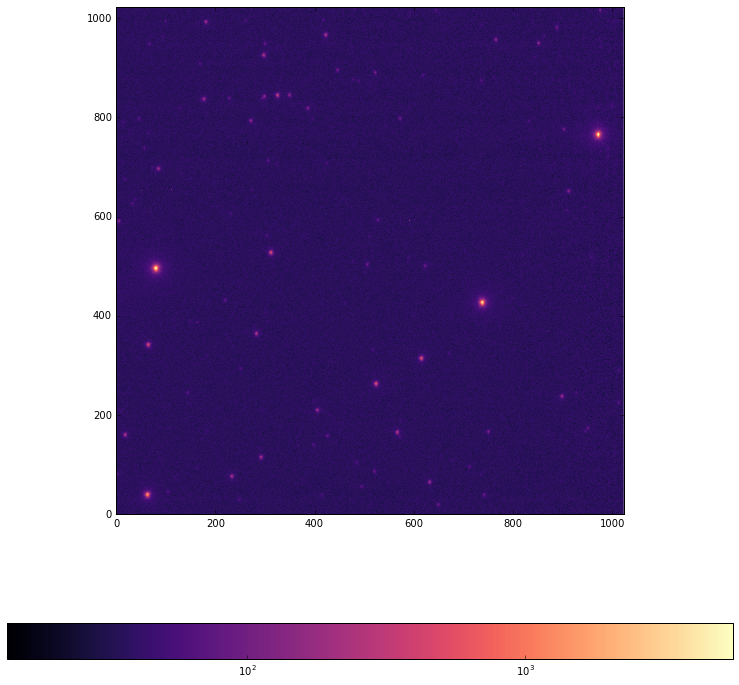

In [3]:
plt.figure(figsize=(13, 13))
plt.imshow(data, norm=LogNorm(vmin=np.min(data), vmax=np.max(data)))
plt.colorbar(orientation='horizontal')

In [4]:
from photutils.detection import DAOStarFinder, IRAFStarFinder
from photutils.psf import DAOGroup
from photutils.psf import IntegratedGaussianPRF
from photutils.background import MedianBackground
from photutils.background import StdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

bkgrms = StdBackgroundRMS(sigma=3.)

std = bkgrms(data)

iraffind = IRAFStarFinder(threshold=5.0*std,
                          fwhm=2.0*gaussian_sigma_to_fwhm,
                          minsep_fwhm=0.1)

daogroup = DAOGroup(2.0*gaussian_sigma_to_fwhm)

median_bkg = MedianBackground(sigma=3.)

psf_model = IntegratedGaussianPRF(sigma=2.0)

fitter = LevMarLSQFitter()

In [5]:
from photutils.psf import DAOPhotPSFPhotometry

daophot_photometry = DAOPhotPSFPhotometry(find=iraffind, group=daogroup,
                                          bkg=median_bkg, psf=psf_model,
                                          fitter=LevMarLSQFitter(),
                                          niters=2, fitshape=(11,11))
result_tab, residual_image = daophot_photometry(image=data)
print(result_tab)

 id group_id     x_fit         y_fit        flux_fit   iter_detected
--- -------- ------------- ------------- ------------- -------------
  1        1 649.932597093 19.3183438737 1521.98497361             1
  2        2 248.422935065 29.6400498257   657.2201623             1
  3        3 63.0305298772 40.0828916979 40794.3665722             1
  4        4 415.162178661  39.485899679 583.549177721             1
  5        5 742.393806599 39.3664613271  1348.8426805             1
  6        6 103.860787924 45.3921190897 772.889005981             1
  7        7 632.389408861 65.0453558676  3715.3430492             1
  8        8 232.814052795 76.6996386859 4938.71627463             1
  9        9 2.85795521688 81.6190147502 871.341029119             1
 10       10 521.128315121 86.8523633387 1276.45614411             1
...      ...           ...           ...           ...           ...
 21       21  388.06098312 813.782381223 294.471014465             2
 22       22 178.314924785 832.210

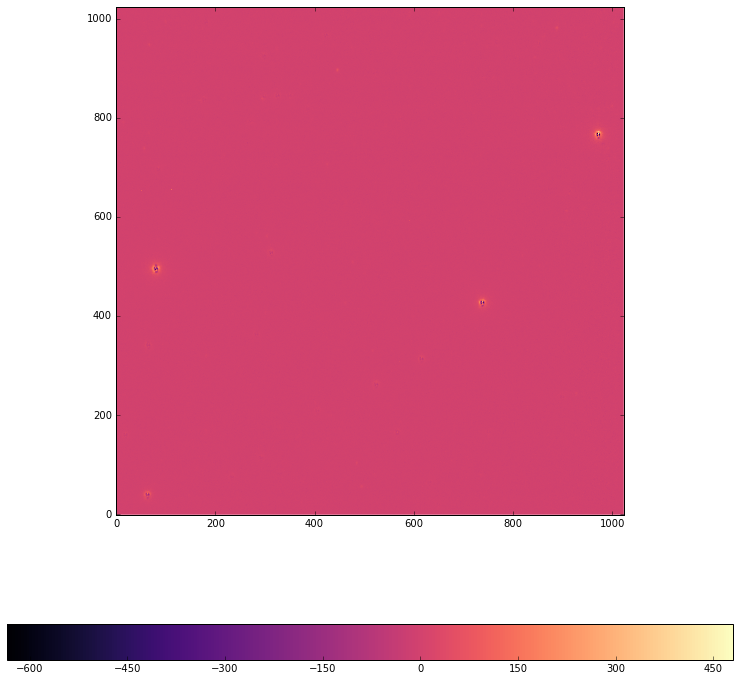

0.216435


In [6]:
plt.figure(figsize=(13, 13))
plt.imshow(residual_image)
plt.colorbar(orientation='horizontal')
plt.show()
print(np.mean(residual_image))